<a href="https://colab.research.google.com/github/JasmineGhumman/SignLanguageDetection/blob/master/resnet50dropout7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!rmdir  --ignore-fail-on-non-empty mydata/test

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!unzip mydata.zip

Archive:  mydata.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of mydata.zip or
        mydata.zip.zip, and cannot find mydata.zip.ZIP, period.


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



    100% |████████████████████████████████| 993kB 27.6MB/s 


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
'''
file_id = '1sNVHpcnPHZiDaSQ6DhhxY1ZbdEByi5gk'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
'''

fid = drive.ListFile({'q':"title='mydata.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('mydata.zip')

In [0]:
!unzip mydata

Archive:  mydata.zip
   creating: mydata/
   creating: mydata/test/
   creating: mydata/test/A/
  inflating: mydata/test/A/1.jpg     
  inflating: mydata/test/A/10.jpg    
  inflating: mydata/test/A/100.jpg   
  inflating: mydata/test/A/101.jpg   
  inflating: mydata/test/A/102.jpg   
  inflating: mydata/test/A/103.jpg   
  inflating: mydata/test/A/104.jpg   
  inflating: mydata/test/A/105.jpg   
  inflating: mydata/test/A/106.jpg   
  inflating: mydata/test/A/107.jpg   
  inflating: mydata/test/A/108.jpg   
  inflating: mydata/test/A/109.jpg   
  inflating: mydata/test/A/11.jpg    
  inflating: mydata/test/A/110.jpg   
  inflating: mydata/test/A/111.jpg   
  inflating: mydata/test/A/112.jpg   
  inflating: mydata/test/A/113.jpg   
  inflating: mydata/test/A/114.jpg   
  inflating: mydata/test/A/115.jpg   
  inflating: mydata/test/A/116.jpg   
  inflating: mydata/test/A/117.jpg   
  inflating: mydata/test/A/118.jpg   
  inflating: mydata/test/A/119.jpg   
  inflating: mydata/test/A/12.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.import numpy as np # linear algebra


In [0]:
#!pip uninstall keras
#!pip install keras==2.0.9
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.models import Model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,GlobalAveragePooling2D,
                          BatchNormalization, Input, Conv2D, Concatenate)
'''from keras.applications import InceptionResNetV2
conv_base= InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(75,75,3))'''

import keras
import numpy as np
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [0]:
res_weights_path = "resnet50_weights.hd"
print("[INFO] loading .." )
#model = ResNet50(include_top=False,input_shape=(64, 64, 3))
base_model =ResNet50(weights='imagenet', include_top=False)
#my_model_2 = ResNet50(weights='imagenet')
#base_model.load_weights('../input/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
# include_top= False means that we won’t be keeping the Fully-Connected (FC) layers at the end of the model


x0 = base_model.output
x1 = GlobalAveragePooling2D()(x0)
x2 = GlobalMaxPooling2D()(x0)
x = Concatenate()([x1,x2])
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(26, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

[INFO] loading ..
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 6s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for layer in model.layers:
    layer.trainable = False

for i in range(-6,0):
    model.layers[i].trainable = True

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.SGD(lr = 0.01),metrics=['accuracy'])

#model.summary()

In [0]:
#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'mydata/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'mydata/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 68250 images belonging to 26 classes.
Found 9775 images belonging to 26 classes.


In [0]:
moDel = model.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=8,
        validation_data = test_set,
        validation_steps = 200
      )

#Saving the model
import h5py
model.save('Trained_model.h5')
modelcheckpoint = keras.callbacks.ModelCheckpoint("keras.model",verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/8
800/800 [==============================] - 389s 486ms/step - loss: 0.9013 - acc: 0.5565 - val_loss: 0.9255 - val_acc: 0.4547
Epoch 2/8
800/800 [==============================] - 379s 473ms/step - loss: 0.6362 - acc: 0.6810 - val_loss: 0.6809 - val_acc: 0.6312
Epoch 3/8
800/800 [==============================] - 371s 464ms/step - loss: 0.3974 - acc: 0.8215 - val_loss: 0.4431 - val_acc: 0.8203
Epoch 4/8
800/800 [==============================] - 370s 463ms/step - loss: 0.2459 - acc: 0.9093 - val_loss: 0.2943 - val_acc: 0.9262
Epoch 5/8
800/800 [==============================] - 369s 461ms/step - loss: 0.1757 - acc: 0.9436 - val_loss: 0.2450 - val_acc: 0.9258
Epoch 6/8
800/800 [==============================] - 367s 458ms/step - loss: 0.1411 - acc: 0.9571 - val_loss: 0.2144 - val_acc: 0.9357
Epoch 7/8
800/800 [==============================] - 367s 459ms/step - loss: 0.1215 - acc: 0.9629 - val_loss: 0.2055 - val_acc: 0.9614
Epoch 8

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
import cv2
import numpy as np

def nothing(x):
    pass

image_x, image_y = 224,224
from keras.models import load_model
classifier = load_model('Trained_model.h5')
print('loaded...')
'''import h5py
f = h5py.File('Trained_model.h5', 'r')
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.
#Get the HDF5 group
group = f[key]

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

data = group['training']
#Do whatever you want with data

#After you are done
f.close()
print(classifier.summary())
for layer in classifier.layers:
    print(layer)
    weights = layer.get_weights()
  '''  
def predictor():
       import numpy as np
       from keras.preprocessing import image
       test_image = image.load_img('mydata/train/C/10.jpg', target_size=(224,224))
       
       test_image = image.img_to_array(test_image)
       test_image = np.expand_dims(test_image, axis = 0)
       result = classifier.predict(test_image)
       print('in predictor              ')
       print(result)
        
       if result[0][0] == 1:
              return 'A'
       elif result[0][1] == 1:
              return 'B'
       elif result[0][2] == 1:
              return 'C'
       elif result[0][3] == 1:
              return 'D'
       elif result[0][4] == 1:
              return 'E'
       elif result[0][5] == 1:
              return 'F'
       elif result[0][6] == 1:
              return 'G'
       elif result[0][7] == 1:
              return 'H'
       elif result[0][8] == 1:
              return 'I'
       elif result[0][9] == 1:
              return 'J'
       elif result[0][10] == 1:
              return 'K'
       elif result[0][11] == 1:
              return 'L'
       elif result[0][12] == 1:
              return 'M'
       elif result[0][13] == 1:
              return 'N'
       elif result[0][14] == 1:
              return 'O'
       elif result[0][15] == 1:
              return 'P'
       elif result[0][16] == 1:
              return 'Q'
       elif result[0][17] == 1:
              return 'R'
       elif result[0][18] == 1:
              return 'S'
       elif result[0][19] == 1:
              return 'T'
       elif result[0][20] == 1:
              return 'U'
       elif result[0][21] == 1:
              return 'V'
       elif result[0][22] == 1:
              return 'W'
       elif result[0][23] == 1:
              return 'X'
       elif result[0][24] == 1:
              return 'Y'
       elif result[0][25] == 1:
              return 'Z'

loaded...


In [0]:
import cv2
import numpy as np

def nothing(x):
    pass

image_x, image_y = 224,224
from keras.models import load_model
classifier = load_model('Trained_model.h5')
print('loaded...')
'''import h5py
f = h5py.File('Trained_model.h5', 'r')
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.
#Get the HDF5 group
group = f[key]

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

data = group['training']
#Do whatever you want with data

#After you are done
f.close()
print(classifier.summary())
for layer in classifier.layers:
    print(layer)
    weights = layer.get_weights()
  '''  
def predictor():
       import numpy as np
       from keras.preprocessing import image
       test_image = image.load_img('mydata/test/H/10.jpg', target_size=(224,224))
       
       test_image = image.img_to_array(test_image)
       test_image = np.expand_dims(test_image, axis = 0)
       result = classifier.predict(test_image)
       print('in predictor              ')
       print(result)
       l=0
       k=0
       for i in range(0,26):
            if result[0][i]>l:
              l=result[0][i]
              k=i
       result[0][k]=1
       if result[0][0] == 1:
              return 'A'
       elif result[0][1] == 1:
              return 'B'
       elif result[0][2] == 1:
              return 'C'
       elif result[0][3] == 1:
              return 'D'
       elif result[0][4] == 1:
              return 'E'
       elif result[0][5] == 1:
              return 'F'
       elif result[0][6] == 1:
              return 'G'
       elif result[0][7] == 1:
              return 'H'
       elif result[0][8] == 1:
              return 'I'
       elif result[0][9] == 1:
              return 'J'
       elif result[0][10] == 1:
              return 'K'
       elif result[0][11] == 1:
              return 'L'
       elif result[0][12] == 1:
              return 'M'
       elif result[0][13] == 1:
              return 'N'
       elif result[0][14] == 1:
              return 'O'
       elif result[0][15] == 1:
              return 'P'
       elif result[0][16] == 1:
              return 'Q'
       elif result[0][17] == 1:
              return 'R'
       elif result[0][18] == 1:
              return 'S'
       elif result[0][19] == 1:
              return 'T'
       elif result[0][20] == 1:
              return 'U'
       elif result[0][21] == 1:
              return 'V'
       elif result[0][22] == 1:
              return 'W'
       elif result[0][23] == 1:
              return 'X'
       elif result[0][24] == 1:
              return 'Y'
       elif result[0][25] == 1:
              return 'Z'

loaded...


In [0]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("Trackbars")

cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)

cv2.namedWindow("test")

img_counter = 0

img_text = ''
while True:
    ret, frame = cam.read()
    frame = cv2.flip(frame,1)
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")


    img = cv2.rectangle(frame, (425,100),(625,300), (0,255,0), thickness=2, lineType=8, shift=0)

    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    imcrop = img[102:298, 427:623]
    hsv = cv2.cvtColor(imcrop, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    cv2.putText(frame, img_text, (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (0, 255, 0))
    cv2.imshow("test", frame)
    cv2.imshow("mask", mask)
    
    #if cv2.waitKey(1) == ord('c'):
        
    img_name = "1.png"
    save_img = cv2.resize(mask, (image_x, image_y))
    cv2.imwrite(img_name, save_img)
    print("{} written!".format(img_name))
    img_text = predictor()
        

    if cv2.waitKey(1) == 27:
        break


cam.release()
cv2.destroyAllWindows()

In [0]:
img_text = predictor()
print(img_text)   

in predictor              
[[0.03154254 0.04232356 0.04876471 0.00679803 0.01117989 0.00751323
  0.01711538 0.22834101 0.0083884  0.05895713 0.01551992 0.05458257
  0.01398438 0.00486991 0.01934537 0.01440987 0.01695666 0.01582465
  0.01105669 0.01223978 0.03635612 0.01049644 0.00439668 0.01104042
  0.01654255 0.00569795]]
H


In [0]:
img_text = predictor()
print(img_text)   

in predictor              
[[0.01539567 0.00818011 0.71465623 0.04940557 0.02478042 0.07736686
  0.0051724  0.02008498 0.01720878 0.0011467  0.00441989 0.25130707
  0.00638765 0.00164652 0.18440232 0.01772949 0.04243487 0.00519386
  0.01334441 0.01077607 0.00412998 0.0016323  0.00742668 0.00506464
  0.00508012 0.00237499]]
None


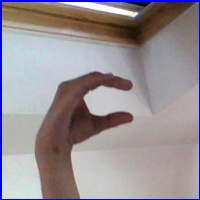

In [0]:
from IPython.display import Image
display(Image('mydata/train/C/10.jpg'))

In [0]:
moDel = model.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=8,
        validation_data = test_set,
        validation_steps = 200
      )

In [0]:
model.save('Trained_model2.h5')

In [0]:
import cv2
import numpy as np

def nothing(x):
    pass

image_x, image_y = 224,224
from keras.models import load_model
classifier = load_model('../working/Trained_model2.h5')
print('loaded...')
'''import h5py
f = h5py.File('Trained_model.h5', 'r')
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.
#Get the HDF5 group
group = f[key]

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

data = group['training']
#Do whatever you want with data

#After you are done
f.close()
print(classifier.summary())
for layer in classifier.layers:
    print(layer)
    weights = layer.get_weights()
  '''  
def predictor():
       import numpy as np
       from keras.preprocessing import image
       test_image = image.load_img('../input/ceecee/228.png', target_size=(224,224))
       test_image = image.img_to_array(test_image)
       test_image = np.expand_dims(test_image, axis = 0)
       result = classifier.predict(test_image)
       print('in predictor              ')
       if result[0][0] == 1:
              return 'A'
       elif result[0][1] == 1:
              return 'B'
       elif result[0][2] == 1:
              return 'C'
       elif result[0][3] == 1:
              return 'D'
       elif result[0][4] == 1:
              return 'E'
       elif result[0][5] == 1:
              return 'F'
       elif result[0][6] == 1:
              return 'G'
       elif result[0][7] == 1:
              return 'H'
       elif result[0][8] == 1:
              return 'I'
       elif result[0][9] == 1:
              return 'J'
       elif result[0][10] == 1:
              return 'K'
       elif result[0][11] == 1:
              return 'L'
       elif result[0][12] == 1:
              return 'M'
       elif result[0][13] == 1:
              return 'N'
       elif result[0][14] == 1:
              return 'O'
       elif result[0][15] == 1:
              return 'P'
       elif result[0][16] == 1:
              return 'Q'
       elif result[0][17] == 1:
              return 'R'
       elif result[0][18] == 1:
              return 'S'
       elif result[0][19] == 1:
              return 'T'
       elif result[0][20] == 1:
              return 'U'
       elif result[0][21] == 1:
              return 'V'
       elif result[0][22] == 1:
              return 'W'
       elif result[0][23] == 1:
              return 'X'
       elif result[0][24] == 1:
              return 'Y'
       elif result[0][25] == 1:
              return 'Z'
img_text = predictor()
print(img_text)

In [0]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')